## Classification : Probabilistic Generative Model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import multivariate_normal

## Naive Bayes Algorithm
   Naive Bayes algorithm is a kind of simple generative model, it has a `naive` assumption of independence between every pair of features.

$$P(X|C_{1})\ =\ P(x_{1}|C_{1})\times \ P(x_{2}|C_{1})\times P(x_{3}|C_{1})....P(x_{k}|C_{1}) $$

Assuming C1 conform to Gaussian distribution, so we can use Gaussian probability density function to eastimate $P(X|C1_{1}) = \prod_{i = 1}^{N} P(x_{i}|C_{1})$

 ###  Data Description
 #### Use pima-indians.data file as our demonstration dataset.([download from here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)).
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. Class variable (0 or 1)

###  Data Processing

In [2]:
dat_names = ["Pregnant", "Plg", "BP", "TSFT", "SI", "BMI", "DP","Age", "Class"]

dat = list()
with open(file = "C:\\Users\\Bing\\Desktop\\NB_dataset.txt", mode = "r+") as readfile:
    for line in readfile:
        dat.append(list(map(lambda x : float(x), line.split(sep = ','))))

In [3]:
df = pd.DataFrame(data = dat, columns = dat_names)
df.head(3)

,Pregnant,Plg,BP,TSFT,SI,BMI,DP,Age,Class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [4]:
def data_split(df, split_ratio = 0.8, rand_seed = 123):
    
    np.random.seed(seed = rand_seed)
    training_index = np.random.choice(df.index, size = int(np.ceil(len(df)*split_ratio)))
    training_data = df.iloc[training_index, :]
    testing_data = df.drop(labels = training_index)

    training_data.index = list(range(len(training_data)))
    testing_data.index = list(range(len(testing_data)))
    
    return(training_data, testing_data)

training_data, testing_data = data_split(df, split_ratio = 0.8)

training_x, training_y = training_data.iloc[:, :-1].as_matrix(), training_data.iloc[:, -1].values
testing_x, testing_y = testing_data.iloc[:, :-1].as_matrix(),testing_data.iloc[:, -1].values

### Summarize Data
 1. Separate Training_Data By Class
 2. Calculate Mean
 3. Calculate Standard Deviation
 4. Summarize Dataset
 5. Summarize Attributes By Class

In [5]:
# summarize each attribute by class
def summarize_data(training_data, target_variable):
    summarize_dic = {}
    class_set = ["class_" + str(i) for i in set(((training_data[target_variable]).values).astype(int))]
    
    for i in range(len(set(training_data[target_variable]))):
        
        temp_data = training_data[training_data[target_variable] == i]
        temp_data = temp_data.drop(columns = [target_variable], axis = 1)
        temp_dic = {"mean" : temp_data.apply(np.mean).values, "std": temp_data.apply(np.std).values}
        
        summarize_dic[class_set[i]] = temp_dic   
    return summarize_dic

In [6]:
summarize = summarize_data(training_data, target_variable = 'Class')
summarize

{'class_0': {'mean': array([  3.51237624, 108.81683168,  67.80940594,  19.16584158,
          69.36386139,  30.34975248,   0.41084406,  31.13861386]),
  'std': array([  3.14616619,  25.74371237,  19.62534759,  14.83672596,
         102.66907707,   8.20593392,   0.29153442,  11.53902522])},
 'class_1': {'mean': array([  5.13744076, 139.3507109 ,  71.24170616,  23.36492891,
         120.492891  ,  34.34028436,   0.55568246,  37.72511848]),
  'std': array([  3.7976135 ,  31.4421192 ,  18.72483119,  17.01948987,
         149.37145942,   5.94910786,   0.35755447,  10.8627929 ])}}

###  Make Prediction
 1. Calculate Gaussian Probability Density Function
 2. Calculate Class Probabilities
 3. Make a Prediction
 4. Estimate Accuracy

In [7]:
def gaussian_probability(x, mean, std):   # 1-D Gaussian probabiluty density function
    exp = np.exp((-1/2)*((x - mean)/std)**2)
    probability = (1/(std*(np.sqrt(2*np.pi)))) * exp
    return(probability)

In [8]:
def cal_probability(x, mean_arr, std_arr):  # also can use `scipy.stats.norm(0, 1).pdf()` to calculate probability
    if x.shape[1] != len(mean_arr) or x.shape[1] != len(std_arr):
        print("Your input x, mean_arr or std_arr have some problems")
    
    calprob_arr = np.array([])
    for i in range(len(x)):
        prob_arr = gaussian_probability(x[i, :], mean = mean_arr, std = std_arr)
        prob = 1
        for temp_prob in prob_arr:
            prob *= temp_prob
        calprob_arr = np.append(calprob_arr, prob)
        
    return calprob_arr

In [9]:
def predict(training_x, summarize_data, probability = False):
    pred = {}
    pred_lable = [key for key in summarize_data.keys()]
    for keys, pl in zip(summarize_data.keys(), pred_lable):
        pred[pl] = cal_probability(x = training_x, mean_arr = summarize_data[keys]['mean'], std_arr = summarize_data[keys]['std'])
    pred_df = pd.DataFrame(data = pred)
    if probability == False:
        class_pred = pred_df.idxmax(axis = 1)
        class_pred = (class_pred.str.replace(pat = 'class_', repl = '').astype(int)).values
        return class_pred
    else:
        return pred_df

In [10]:
prediction = predict(training_x = testing_x, summarize_data = summarize)

In [11]:
def accuracy(prediction_outcome, y):
    acc = sum(prediction_outcome == y)/len(prediction_outcome)
    print("Accuracy Rate => %.3f" % (acc))
    return acc 

accuracy(prediction_outcome = prediction, y = testing_y)

Accuracy Rate => 0.730


0.7296511627906976

### Tie it together

In [12]:
class Gaussian_Naive_Bayes:
    
    def __init__(self):
        pass
    
    def fit(self, training_data, target_variable):  # calculate the mean and standard deviation of each attribute
        """
        type of training_data : pd.DataFrame
        type of target_variable : string
        """
        self.summarize_dic = {}
        class_set = ["class_" + str(i) for i in set(((training_data[target_variable]).values).astype(int))]

        for i in range(len(set(training_data[target_variable]))):

            temp_data = training_data[training_data[target_variable] == i]
            temp_data = temp_data.drop(columns = [target_variable], axis = 1)
            temp_dic = {"mean" : temp_data.apply(np.mean).values, "std": temp_data.apply(np.std).values}

            self.summarize_dic[class_set[i]] = temp_dic   
    
    def __gaussian_probability(self, x, mean, std): # 1-D Gaussian probabiluty density function
        exp = np.exp((-1/2)*((x - mean)/std)**2)
        probability = (1/(std*(np.sqrt(2*np.pi)))) * exp
        return(probability)
    
    def __cal_probability(self, x, mean_arr, std_arr):  # calculate the probability
        if x.shape[1] != len(mean_arr) or x.shape[1] != len(std_arr):
            print("Your input x, mean_arr or std_arr have some problems")

        calprob_arr = np.array([])
        for i in range(len(x)):
            prob_arr = self.__gaussian_probability(x[i, :], mean = mean_arr, std = std_arr)
            prob = 1
            for temp_prob in prob_arr:
                prob *= temp_prob
            calprob_arr = np.append(calprob_arr, prob)

        return calprob_arr
    
    def predict(self, testing_x, probability = False): # the summarize of attribute is parameter of the model
        """
        type of testing : np.array 
        
        """
        pred = {}
        pred_lable = [key for key in self.summarize_dic.keys()]
        for keys, pl in zip(self.summarize_dic.keys(), pred_lable):
            
            pred[pl] = self.__cal_probability(x = testing_x, mean_arr = self.summarize_dic[keys]['mean'],
                                            std_arr = self.summarize_dic[keys]['std'])
        pred_df = pd.DataFrame(data = pred)
        
        if probability == False:
            class_pred = pred_df.idxmax(axis = 1)
            class_pred = (class_pred.str.replace(pat = 'class_', repl = '').astype(int)).values
            return class_pred
        else:
            return pred_df
    
    def accuracy(self, prediction_outcome, y):
        acc = sum(prediction_outcome == y)/len(prediction_outcome)
        return acc      

In [13]:
NB = Gaussian_Naive_Bayes()
NB.fit(training_data = training_data, target_variable= "Class")
pred = NB.predict(testing_x = testing_x)
acc = NB.accuracy(pred, y = testing_y)
print("Accuracy Rate => %.5f" % (acc))

Accuracy Rate => 0.72965


### Visualize decision boundary

In [14]:
def plot_decision_boundary(data, x_var, y_var, target_variable):

    sub_data = data[[x_var, y_var, target_variable]]

    target_class = sub_data[target_variable]

    x_min, x_max = sub_data[x_var].min(), sub_data[x_var].max()
    y_min, y_max = sub_data[y_var].min(), sub_data[y_var].max()

    xx, yy = np.meshgrid(np.linspace(x_min - 1, x_max + 1 , num = 100), np.linspace(y_min - 1, y_max + 1 , num = 100))

    pair_data = np.c_[xx.ravel(), yy.ravel()]

    NB = Gaussian_Naive_Bayes()
    NB.fit(training_data = sub_data, target_variable = target_variable)
    zz = NB.predict(testing_x = pair_data)

    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap = plt.cm.Pastel2)
    plt.contour(xx, yy, zz, linewidths = 0.5, colors = 'black')

    zz = zz.reshape(xx.shape)

    for target in set(target_class):
        plot_x = sub_data[(sub_data[target_variable] == target)][x_var]
        plot_y = sub_data[(sub_data[target_variable] == target)][y_var]
        plt.scatter(x = plot_x, y = plot_y, color = ['r', 'g', 'b'][int(target)], label = int(target), marker = '.')

    plt.legend()
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

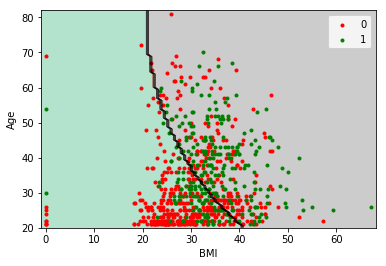

In [15]:
plot_decision_boundary(data = df, x_var = "BMI", y_var = "Age", target_variable = "Class")

### Try for the other Toy data

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
iris_df = np.concatenate((iris.data, iris.target.reshape(len(iris.data), 1)), axis = 1)
col_names = iris.feature_names.copy()
col_names.append('class')

iris_df = pd.DataFrame(data = iris_df, columns = col_names)

iris_df = iris_df[["sepal length (cm)", "petal length (cm)", "class"]]

In [18]:
training_data, testing_data = data_split(iris_df, split_ratio = 0.8)
training_x, training_y = training_data.iloc[:, :-1], training_data.iloc[:, -1]
testing_x, testing_y = testing_data.iloc[:, :-1], testing_data.iloc[:, -1]

NB = Gaussian_Naive_Bayes()
NB.fit(training_data = training_data, target_variable = "class")
pred = NB.predict(testing_x = testing_x.as_matrix())
NB.accuracy(pred, y = testing_y)
print("Accuracy Rate => %.5f" % (acc))

Accuracy Rate => 0.72965


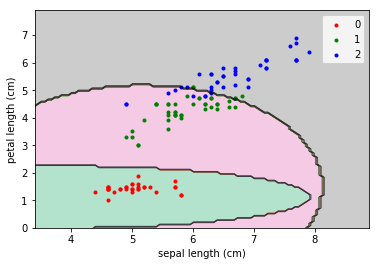

In [19]:
plot_decision_boundary(data = training_data, x_var = "sepal length (cm)", y_var = "petal length (cm)",
                       target_variable = "class")

## More Complex Generative Model

Naive Bayes model has a `naive` assumption, but this assumption can't always set up.

Therefore, we need to break through the assumption.

$$P(C_{1}|X)\ =\ \dfrac{P(x|C_{1})P(C_{1})}{P(C_{1})P(x|C_{1})\ +\ P(x|C_{2})P(C_{2})}$$

#### (1). Summarize Data
 1. Separate Training_data By Class
 2. Calculate Mean
 3. Calculate the proprotion of each class 
 4. Calculate Covariance of each features
  - If you use the same covariance between each class, it needs to calculate weighted covariance.
  - If you don't use the same covariance between each class, it needs to use corresponding covariance of each class.
 
#### (2). Make Prediction

 1. Calculate Gaussian Probability Density Function
 2. Calculate Class Probabilities
 3. Make a Prediction
 4. Estimate Accuracy

In [20]:
from scipy.stats import multivariate_normal

In [21]:
class generative_model:
    def __init__(self):
        pass
    
    def __summarize_data(self, training_data, target_variable):
        summarize_dic = {}
        self.__class_set = ["class_" + str(i) for i in set(((training_data[target_variable]).values).astype(int))] 
        # class_set is keyword for all new creation dictionary. 
        for i in range(len(set(training_data[target_variable]))):

            temp_data = training_data[training_data[target_variable] == i]
            temp_data = temp_data.drop(columns = [target_variable], axis = 1)
            temp_dic = {"mean" : temp_data.apply(np.mean).values}

            summarize_dic[self.__class_set[i]] = temp_dic   
        return summarize_dic
    
    def __get_covar_each(self, training_data, target_variable): # get covariance of each class. 
        covar_dic = {}
        for target, cl in zip(set(training_data[target_variable]), self.__class_set):
            temp_data = training_data[training_data[target_variable] == target]
            temp_data = temp_data.drop(columns = target_variable).as_matrix()
            covar = np.cov(m = temp_data, rowvar = False)
            covar_dic[cl] = covar
        return covar_dic
    
    def __portion_of_data(self, training_data, target_variable): # calculate the proportion of each class.

        total_data = len(training_data)
        len_dic = {}
        for target, cl in zip(set(training_data[target_variable]), self.__class_set):
            len_dic[cl] = len(training_data[training_data[target_variable] == target])/total_data

        return(len_dic)
    
    def __weighted_sum_covar(self, training_data, covar_dic, target_variable):
        # Calculate covariance without separting class.
        # Calculate the covariance of each attributes, then weighted sum by the number of data in class.
        covariance = 0
        for cl in self.__class_set:
            covariance += self.__len_dic[cl] * covar_dic[cl]
        return(covariance)
    
    def fit(self, training_data, target_variable, same_covar = True):
        
        self.same_covar = same_covar
        
        self.summarize = self.__summarize_data(training_data = training_data, target_variable = target_variable)
        self.covar_dic = self.__get_covar_each(training_data = training_data, target_variable = target_variable)
        self.__len_dic = self. __portion_of_data(training_data = training_data, target_variable = target_variable)
        # assume the same covariance between each class.  
        if same_covar == True:
            self.covariance = self.__weighted_sum_covar(training_data = training_data, covar_dic = self.covar_dic, 
                                                        target_variable = target_variable)
    
    def predict(self, testing_x):
        
        if self.same_covar == True:
            
            prob_sum = 0
            for key in self.summarize.keys():
                prob_sum += multivariate_normal.pdf(testing_x, mean = self.summarize[key]['mean'],
                                                    cov = self.covariance)*self.__len_dic[key]
            pred_dic = {}
            for key in self.summarize.keys():
                pred_dic[key] = (multivariate_normal.pdf(testing_x, mean = self.summarize[key]['mean'],
                                                         cov = self.covariance)*self.__len_dic[key])/prob_sum

            pred_table = pd.DataFrame(data = pred_dic)
            pred_label = pred_table.idxmax(axis = 1).str.replace(pat = 'class_', repl = '').astype(int).values

            return pred_label
        else:
            prob_sum = 0
            for key in self.summarize.keys():
                prob_sum += multivariate_normal.pdf(testing_x, mean = self.summarize[key]['mean'],
                                                    cov = self.covar_dic[key])*self.__len_dic[key]
                        
            pred_dic = {}
            for key in self.summarize.keys():
                pred_dic[key] = (multivariate_normal.pdf(testing_x, mean = self.summarize[key]['mean'], 
                                                         cov = self.covar_dic[key])*self.__len_dic[key])/prob_sum
            pred_table = pd.DataFrame(data = pred_dic)
            pred_label = pred_table.idxmax(axis = 1).str.replace(pat = 'class_', repl = '').astype(int).values
            return pred_label
        
    def accuracy(self, prediction_outcome, y):
        acc = sum(prediction_outcome == y)/len(prediction_outcome)
        return acc     

In [22]:
# using pima-indians.data 
training_data, testing_data = data_split(df, split_ratio = 0.8)

training_x, training_y = training_data.iloc[:, :-1].as_matrix(), training_data.iloc[:, -1].values
testing_x, testing_y = testing_data.iloc[:, :-1].as_matrix(),testing_data.iloc[:, -1].values

In [23]:
gm = generative_model()
gm.fit(training_data = training_data, target_variable = "Class", same_covar = True)
pred = gm.predict(testing_x = training_x)
acc = gm.accuracy(prediction_outcome = pred, y = training_y)
print("Accuracy Rate => %.5f" % (acc))

Accuracy Rate => 0.77073


In [24]:
def plot_decision_boundary(data, x_var, y_var, target_variable, same_covar = True):

    sub_data = data[[x_var, y_var, target_variable]]

    target_class = sub_data[target_variable]

    x_min, x_max = sub_data[x_var].min(), sub_data[x_var].max()
    y_min, y_max = sub_data[y_var].min(), sub_data[y_var].max()

    xx, yy = np.meshgrid(np.linspace(x_min - 1, x_max + 1 , num = 200), np.linspace(y_min - 1, y_max + 1 , num = 200))

    pair_data = np.c_[xx.ravel(), yy.ravel()]
    
    gm = generative_model() # replace model
    gm.fit(training_data = sub_data, target_variable = target_variable, same_covar = same_covar)
    zz = gm.predict(testing_x = pair_data)
    
    #NB = Gaussian_Naive_Bayes()
    #NB.fit(training_data = sub_data, target_variable = target_variable)
    #zz = NB.predict(testing_x = pair_data)

    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap = plt.cm.Pastel2)
    plt.contour(xx, yy, zz, linewidths = 0.5, colors = 'black')

    zz = zz.reshape(xx.shape)

    for target in set(target_class):
        plot_x = sub_data[(sub_data[target_variable] == target)][x_var]
        plot_y = sub_data[(sub_data[target_variable] == target)][y_var]
        plt.scatter(x = plot_x, y = plot_y, color = ['r', 'g', 'b'][int(target)], label = int(target), marker = '.')

    plt.legend()
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

### Visualize decision boundary

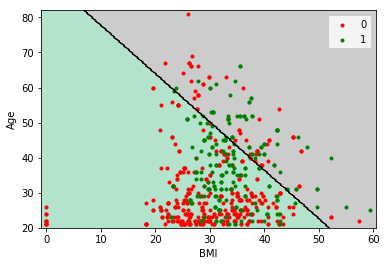

In [25]:
plot_decision_boundary(data = training_data, x_var = "BMI", y_var = "Age",
                       target_variable = "Class", same_covar = True)

In [26]:
# using iris data set
training_data, testing_data = data_split(iris_df, split_ratio = 0.8)
training_x, training_y = training_data.iloc[:, :-1], training_data.iloc[:, -1]
testing_x, testing_y = testing_data.iloc[:, :-1], testing_data.iloc[:, -1]

In [27]:
gm = generative_model()
gm.fit(training_data = training_data, target_variable = "class", same_covar = True)
pred = gm.predict(testing_x = training_x)
acc = gm.accuracy(prediction_outcome = pred, y = training_y)
print("Accuracy Rate => %.5f" % (acc))

Accuracy Rate => 0.93333


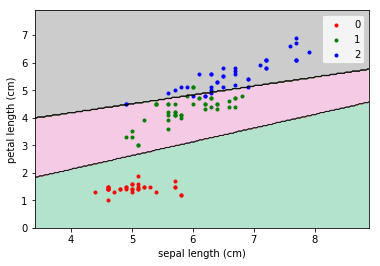

In [28]:
plot_decision_boundary(data = training_data, x_var = "sepal length (cm)", y_var = "petal length (cm)",
                       target_variable = "class")

## Sklearn Naive Bayes Algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [30]:
# pima-indians dataset 
training_data, testing_data = data_split(df, split_ratio = 0.8)

training_x, training_y = training_data.iloc[:, :-1].as_matrix(), training_data.iloc[:, -1].values
testing_x, testing_y = testing_data.iloc[:, :-1].as_matrix(),testing_data.iloc[:, -1].values

In [31]:
gnb = GaussianNB()
gnb.fit(X = training_x, y = training_y)
pred = gnb.predict(X = testing_x)

In [32]:
print("Accuracy : {0:.2f}%".format(metrics.accuracy_score(testing_y, pred)*100))

Accuracy : 74.42%


In [33]:
print(metrics.classification_report(y_true = testing_y, y_pred = pred))

             precision    recall  f1-score   support

        0.0       0.78      0.83      0.81       218
        1.0       0.67      0.59      0.63       126

avg / total       0.74      0.74      0.74       344



In [34]:
def plot_decision_boundary(data, x_var, y_var, target_variable):

    sub_data = data[[x_var, y_var, target_variable]]

    target_class = sub_data[target_variable]

    x_min, x_max = sub_data[x_var].min(), sub_data[x_var].max()
    y_min, y_max = sub_data[y_var].min(), sub_data[y_var].max()

    xx, yy = np.meshgrid(np.linspace(x_min - 1, x_max + 1 , num = 200), np.linspace(y_min - 1, y_max + 1 , num = 200))

    pair_data = np.c_[xx.ravel(), yy.ravel()]
        
    gnb = GaussianNB() # replace model
    gnb.fit(X = sub_data[[x_var, y_var]], y = sub_data[target_variable])
    zz = gnb.predict(X = pair_data)

    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap = plt.cm.Pastel2)
    plt.contour(xx, yy, zz, linewidths = 0.5, colors = 'black')

    zz = zz.reshape(xx.shape)

    for target in set(target_class):
        plot_x = sub_data[(sub_data[target_variable] == target)][x_var]
        plot_y = sub_data[(sub_data[target_variable] == target)][y_var]
        plt.scatter(x = plot_x, y = plot_y, color = ['r', 'g', 'b'][int(target)], label = int(target), marker = '.')

    plt.legend()
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

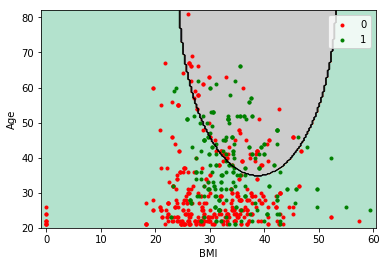

In [35]:
# only use two variable to built model and visualize the decision region.
plot_decision_boundary(data = training_data, x_var = "BMI", y_var = "Age",
                       target_variable = "Class")

### Reference : 
 - [sklearn Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
 - [How To Implement Naive Bayes From Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/) by [Jason Brownlee](https://machinelearningmastery.com/)
 - [NTU Machine Learning 2017 Hung-yi Lee](http://speech.ee.ntu.edu.tw/~tlkagk/courses_ML17.html)